In [33]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [25]:
bonair = pd.read_csv('../Cleaned_data/ABS Alaskan/Bonaire/513790_system_energy_20141206_to_20190522.csv')
bonair.head()

,Date/Time,Energy Produced (Wh)
0,12/6/2014 0:00,1874
1,12/7/2014 0:00,164
2,12/8/2014 0:00,433
3,12/9/2014 0:00,270
4,12/10/2014 0:00,138


In [26]:
bonair_new = bonair.copy(deep=True)
for i in range(len(bonair)):
    bonair_new['Date/Time'][i] = bonair_new['Date/Time'][i].rsplit(' ',1)[0]

/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
bonair_new['DC Capacity'] = ""
bonair_new['DC Capacity'][0] = 12
bonair_new['Location'] = ""
bonair_new['Location'][0] = 'Fairbanks_Bonaire_Appts1902_Mary_Ann_St'

/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [28]:
bonair_new

,Date/Time,Energy Produced (Wh),DC Capacity,Location
0,12/6/2014,1874,12,Fairbanks_Bonaire_Appts1902_Mary_Ann_St
1,12/7/2014,164,,
2,12/8/2014,433,,
3,12/9/2014,270,,
4,12/10/2014,138,,
5,12/11/2014,136,,
6,12/12/2014,51,,
7,12/13/2014,440,,
8,12/14/2014,1374,,
9,12/15/2014,766,,


In [29]:
bonair_new.to_csv('bonair_fairbanks',index=False)

In [30]:
bonair = pd.read_csv('bonair_fairbanks')

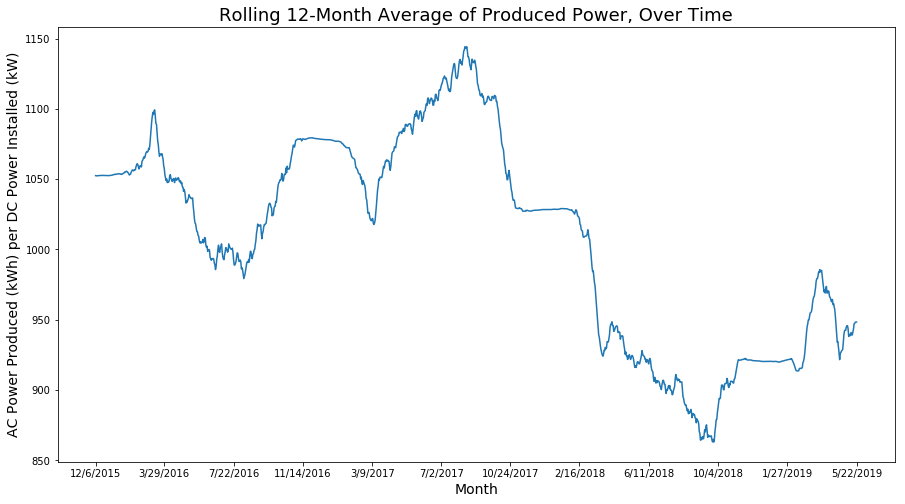

In [34]:
# copy a the dataframe
bonair_new = bonair.copy(deep=True)

# drop the last 'total energy'
bonair_new.drop(bonair_new.tail(1).index,inplace=True)

# get the index of the last day

lenth_list = list(range(365,len(bonair_new.index)))
annual_values = []
date = []
for i in range(len(lenth_list)):
    single_values = bonair_new['Energy Produced (Wh)'][lenth_list[i]-365:lenth_list[i]].sum()/bonair_new['DC Capacity'][0]/1000
    #rolling_average.append(each_period)
    single_date = bonair_new['Date/Time'][lenth_list[i]]
    # append the result we want to the list
    annual_values.append(single_values)
    date.append(single_date)    

bonair_with_annual = pd.DataFrame({'Date':date,'Annual_production':annual_values})

plt.subplots(figsize = (15, 8))
plt.plot(bonair_with_annual['Date'],bonair_with_annual['Annual_production'])
tick_spacing = np.linspace(0, len(bonair_with_annual.index)-1, 12, dtype = 'int')
plt.xticks(tick_spacing)
plt.xlabel("Month", size = 14)
plt.title("Rolling 12-Month Average of Produced Power, Over Time", size = 18)
plt.ylabel("AC Power Produced (kWh) per DC Power Installed (kW)", size = 14)
plt.show()